In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

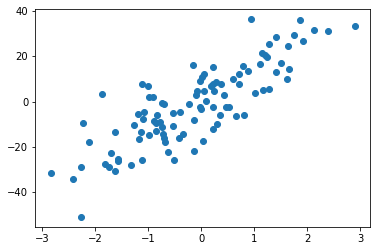

In [13]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x,y)

In [16]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [18]:
#creation de la matrice X
X = np.hstack((x, np.ones(x.shape)))
X

array([[-1.74507935,  1.        ],
       [-1.32828034,  1.        ],
       [ 1.41775241,  1.        ],
       [ 0.65843122,  1.        ],
       [ 1.17307494,  1.        ],
       [ 1.91891026,  1.        ],
       [-0.99489616,  1.        ],
       [ 0.05920161,  1.        ],
       [-0.02432075,  1.        ],
       [ 0.29931159,  1.        ],
       [-0.13563532,  1.        ],
       [-1.11594041,  1.        ],
       [ 0.08801311,  1.        ],
       [-0.51531077,  1.        ],
       [-1.62926392,  1.        ],
       [ 1.50396517,  1.        ],
       [-1.09102731,  1.        ],
       [-1.07197886,  1.        ],
       [-0.10350129,  1.        ],
       [-2.11536027,  1.        ],
       [-0.7098402 ,  1.        ],
       [-0.9094476 ,  1.        ],
       [-1.80606976,  1.        ],
       [ 0.80474842,  1.        ],
       [-0.53622102,  1.        ],
       [-0.74658433,  1.        ],
       [ 1.1069788 ,  1.        ],
       [-0.88177588,  1.        ],
       [-0.42651849,

In [20]:
theta = np.random.randn(2,1)
theta

array([[2.86011362],
       [0.5365769 ]])

In [21]:
def model(X,theta):
    return X.dot(theta)

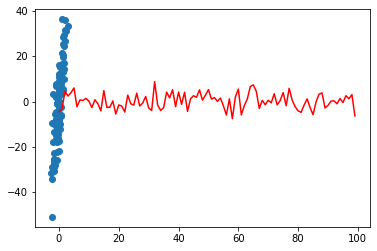

In [37]:
plt.scatter(x,y)
plt.plot(model(X, theta), c='r')

In [40]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta) - y )**2)

In [41]:
cost_function(X,y,theta)

112.53050867407038

In [42]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X , theta) - y)

In [51]:
def gradient_descent(X,y,theta, learning_rate , n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range (0 , n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta) 
    return theta, cost_history

In [53]:
theta_final, cost_history = gradient_descent(X,y,theta , learning_rate=0.01 , n_iterations=1000)

In [46]:
theta_final

array([[10.0797179 ],
       [-0.03180007]])

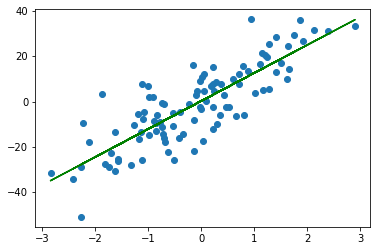

In [49]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x , predictions , c='g')

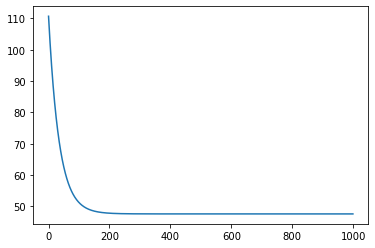

In [54]:
plt.plot(range(1000),cost_history)

In [55]:
def coef_determination(y,pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v